# This note is from [Welch Labs](https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLxtZWOzqbApW6Yvw41wDf0uc5hixr1b02)


## Standardize Unit - Scaling

In [4]:
import numpy as np

# X is a 3 x 2 matrix inputs
X = np.array([[3,5], [5,1], [10,2]])
y = np.array([75,82,93])

X = X/np.amax(X, axis=0)
y = y/100.0 # y is the output, Max test score is 100

print X
print y

[[0 1]
 [0 0]
 [1 0]]
[ 0.75  0.82  0.93]


## Forward porpagation

### 1.

Suppose the wieghts for the three hidden layers are [[w11, w12, w13], [w21, w22, w23]]

Z = np.dot(X, W1), Z is the hidden layer, so Z will be a 3 x 3 matrics

### 2. Activation function

a = f(Z)

In [5]:
def sigmoid(z):
    # apply sigmoid activation function
    return 1/(1+np.exp(-z))

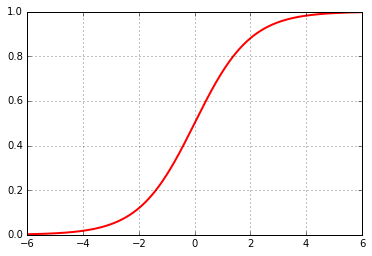

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth=2, color='r')
plt.grid(1)
plt.show()

### 3. propagate a to y hat

yHat = np.dot(a, W2)

In [77]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*np.sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [78]:
NN = Neural_Network()
yHat = NN.forward(X)

yHat

array([[ 0.64094077],
       [ 0.62531055],
       [ 0.62486525]])

In [79]:
y

array([ 0.75,  0.82,  0.93])

In [80]:
J = 0.5*np.sum((y-yHat)**2)
print J

0.210320974215


In [81]:
yHat = NN.forward(X)
        
delta3 = np.multiply(-(y-yHat), NN.sigmoidPrime(NN.z3))
print np.dot(NN.a2.T, delta3)
print delta3  
print NN.W2
print np.dot(delta3, NN.W2) #*NN.sigmoidPrime(NN.z2)
'''  
dJdW1 = np.dot(X.T, delta2)  
        
print dJdW1, dJdW2
'''

[[-0.03901023 -0.06197475 -0.09806184]
 [-0.03149091 -0.04997262 -0.07901531]
 [-0.04959429 -0.07872166 -0.12449323]]
[[-0.02509842 -0.04120792 -0.06652285]
 [-0.0292144  -0.04561521 -0.07138791]
 [-0.02933267 -0.04574128 -0.07152623]]
[[-0.12712949]
 [ 0.4238212 ]
 [ 0.72761   ]]
[[-0.06267673]
 [-0.06756123]
 [-0.06770028]]


'  \ndJdW1 = np.dot(X.T, delta2)  \n        \nprint dJdW1, dJdW2\n'

## Gradient decent

error = y - yhat

J: cost = sum(error^2)

J = sum(1/2 (y - f(f(XW1)W2))^2, 

if derivative is positive, the cost function is going uphill, if derivative is negative, the cost function is going uphill, 

Training a network = Minimizing a cost function

Premature optimization is the root of all evil -- Donald Knuth

Stochastic Gradient Descent -- non convex loss function

Batch Gradient Descent

In [82]:
NN.W1[0,0] = 1.1
NN.W1

array([[ 1.1       , -1.21001839,  0.54261602],
       [ 0.1517705 , -0.38778281,  0.64056827]])

In [83]:
yHat = NN.forward(X)

# calculate the J function
sum(0.5 * (y - yHat) **2)

array([ 0.02303429,  0.05630041,  0.13827573])

In [84]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2 * e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

In [85]:
#from videoSupport import *
NN = Neural_Network()

In [86]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([ 0.00520041,  0.00633293,  0.00754233,  0.00516345,  0.00738025,
        0.00669254,  0.02855155,  0.02999945,  0.02949367])

In [87]:
grad = NN.computeGradients(X, y)
print grad

[ 0.00625115  0.0048915   0.00587193  0.00604083  0.00554809  0.00507108
  0.01943468  0.01110398 -0.00198711  0.02023858  0.01163802 -0.00187715
  0.0203095   0.01150775 -0.00232357]


In [43]:
from numpy.linalg.linalg import norm
norm(grad-numgrad)/norm(grad+numgrad)

ValueError: operands could not be broadcast together with shapes (15,) (9,) 

### Bonus Derivative

![Derivative](derivative.png)

In [188]:
from IPython.display import YouTubeVideo
YouTubeVideo('pHMzNW8Agq4')

In [90]:
def sigmoid(z):
    # apply sigmoid activation function
    return 1/(1+np.exp(-z))

In [94]:
def sigmoidPrime(z):
    #Gradient of sigmoid
    return np.exp(-z)/((1+np.exp(-z))**2)

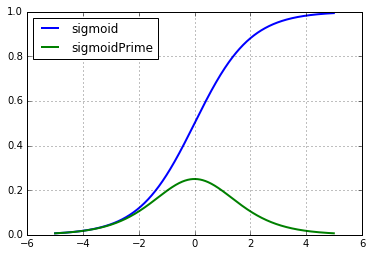

In [100]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(True)
plt.legend(['sigmoid', 'sigmoidPrime'], loc='upper left')